# Trabajo Práctico 1 - Matrices de Insumo Producto
**Grupo:** Grupo Sin Nombre

**Integrantes:** Luna Praino, Gabriel Esquerdo y Jonathan Semelak

## Enunciado y objetivos

En este trabajo práctico se aplican conocimientos adquiridos en la materia al modelo de Insumo-Producto de Leontief. Este modelo divide la economía en sectores que generan productos utilizando insumos de otros sectores o de sí mismos. El modelo admite no solo la demanda interna de los sectores, sino también una demanda externa. Así, se tiene que el total del producto necesario para satisfacer ambas demandas puede formalizarse como un problema típico de álgebra lineal

$$\mathbf{p} = \mathbf{A} \cdot \mathbf{p} + \mathbf{d} \qquad (1)$$

donde $\mathbf{A}$ es la matriz de flujo. La matriz $\mathbf{A}$ se forma de los vectores de insumos, significando que la columna $j$ representa los insumos requeridos de cada sector para satisfacer la producción del sector $j$.
Una economía se dice abierta si $\mathbf{d} \neq 0$ cerrada si $\mathbf{d}=0$. En este último caso, todas las salidas producidas por los Sectores sirven como insumos de estos sectores, sin demanda externa.

El problema que resuelve el modelo de Leontief es calcular la producción $\mathbf{p}$ necesaria de cada sector para satisfacer la demanda interna y externa, conociendo $\mathbf{A}$ y $\mathbf{d}$.

Matemáticamente, y a partir de la ecuación 1
$$\mathbf{p}= (\mathbf{I} - \mathbf{A})^{-1} \mathbf{d} = \mathbf{L}\mathbf{d} \qquad (2)$$

donde la inversa de $(\mathbf{I} - \mathbf{A})$ también se conoce como $\mathbf{L}$ y se llama matriz de Leontief.

Este trabajo práctico tiene como objetivos:

* Aplicar conocimientos vistos en la materia a un problema de interés general. Estos conocimientos abarcan desde operaciones típicas entre matrices hasta cálculo de inversas mediante factorización LU.

* Familiarizarse con el modelo de matrices de insumo-producto de Leontief.

* Aplicar el modelo de Leontief en datos reales correspondientes a las matrices insumo-producto latinoaméricanas del año 2011.

### Importante:

Para ejectutar las celdas de aquí en adelante, es imperativo haber importado el módulo funciones correspondiente al archivo **funciones.py**, según lo indicado en el enunciado:


In [17]:
import numpy as np
import funciones

### Consigna 1

Como primera consigna se pide analizar qué sucede con la solución del sistema 2 en cada uno de los siguiente casos:

a) $(\mathbf{I} - \mathbf{A})$ es inversible

b) $(\mathbf{I} - \mathbf{A})$ es inversible y $\mathbf{d} = 0$

c) $(\mathbf{I} - \mathbf{A})$ no es inversible

d) $(\mathbf{I} - \mathbf{A})$ no es inversible y $\mathbf{d} = 0$

### Respuesta

A continuación se analiza caso por caso el efecto de distintas condiciones en $(\mathbf{I} - \mathbf{A})$ y $\mathbf{d}$ en la solución del modelo de Leontief:

a) $(\mathbf{I} - \mathbf{A})$ es inversible

Es decir, existe $(\mathbf{I} - \mathbf{A})^{-1}$. Esto me dice que $\mathbf{dim}(\mathbf{Nu(I - A)) = 0}$, lo que me asegura que para un valor de $\mathbf{d}$ existe una única solución $\mathbf{p}$ que satisface la ecuación del modelo.

b) $(\mathbf{I} - \mathbf{A})$ es inversible y $\mathbf{d} = 0$

Esto es, existe $(\mathbf{I} - \mathbf{A})^{-1}$, entonces se puede calcular $\mathbf{p}$ usando la ecuación (2) (ver enunciado); pero como $\mathbf{d} = 0$, entonces la economía es cerrada, es decir, no hay demanda externa, o sea la única solución (por lo explicado en el enunciado a) $\mathbf{p}$ que satisface la ecuación del modelo es $\mathbf{p = 0}$.

c) $(\mathbf{I} - \mathbf{A})$ no es inversible. En este caso, dependiendo de la demanda $\mathbf{d}$, el sistema podría no tener solución, o bien, tener infinitas soluciones. Para que haya solución, la(s) fila(s) que se anula(n) al triangular $(\mathbf{I} - \mathbf{A})$ tienen que anularse también en $\mathbf{d}$.

Entonces se presentan dos situaciones; en primer lugar, $\mathbf{dim(Nu(I - A)) > 0}$, lo que indica que $\mathbf{p}$ tiene infinitas soluciones. En segundo lugar, que el sistema no tiene solución, o sea, que no pueda calcularse la producción necesaria para satisfacer las demandas.

d) $(\mathbf{I} - \mathbf{A})$ no es inversible y $\mathbf{d} = 0$. En este caso, hay infinitas soluciones (por lo enunciado anteriormente) (y $\mathbf{p = 0}$ es una de ellas).

### Consigna 2

El objetivo de esta consigna es implementar el cálculo de la inversa de la matriz $(\mathbf{I} - \mathbf{A})$ aplicando la factorización LU. Se indica además que para resolver sistemas, únicamente podría utilizarse la función **scipy.linalg.solve_triangular** de la biblioteca **scipy.linalg**, que resuelve sistemas triangulares.

#### Respuesta

En el documento funciones.py, adjunto a la entrega de esta notebook, se encuentra la implementación de las funciones requeridas. De acuerdo a lo requerido, se implementaron las funciones **calcularLU**, que recibe una matriz $\mathbf{A}$ y devuelve tanto su decomposición LU (matrices $\mathbf{L}$  y $\mathbf{U}$) como la matriz de permutación $\mathbf{P}$ asociada, e **inversaLU** que toma como input las matrices $\mathbf{L}$, $\mathbf{U}$ y $\mathbf{P}$ y devuelve la inversa de la matriz $\mathbf{A}$ que satisface $\mathbf{PA}=\mathbf{LU}$.

Cabe destacar que el criterio utilizado para el intercambio de filas fue el de encontrar un pivot nulo.

A continuación se muestran algunos ejemplos de su funcionamiento.

In [18]:
#Genero tests para demostrar que las funciones de funciones.py funcionan correctamente.

A = funciones.generar_matriz_random_no_singular(4)

print("Matriz A:\n", A)

L, U, P = funciones.calcularLU(A)
print("Matriz L:\n", L)
print("Matriz U:\n", U)
print("Matriz P:\n", P)

A_inv = funciones.inversaLU(L, U, P)
print("Matriz inversa de A:\n", A_inv)

print("A por su inversa es la identidad:", np.allclose(A@A_inv,np.eye(4)))

Matriz A:
 [[ 0.99969311 -0.35289478 -0.71229262 -0.03815034]
 [-0.98786639  0.18810876 -0.63780639 -0.5937005 ]
 [-0.85176473 -0.10202465  0.12216838 -0.05886133]
 [-0.90548155 -0.76680657 -0.3384648   0.78412071]]
Matriz L:
 [[ 1.          0.          0.          0.        ]
 [-0.98816965  1.          0.          0.        ]
 [-0.85202621  2.50729944  1.          0.        ]
 [-0.90575951  6.76443918  2.81046396  1.        ]]
Matriz U:
 [[ 0.99969311 -0.35289478 -0.71229262 -0.03815034]
 [ 0.         -0.16061115 -1.34167234 -0.63139951]
 [ 0.          0.          2.8792507   1.49174122]
 [ 0.          0.          0.          0.82814433]]
Matriz P:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Matriz inversa de A:
 [[ 0.37001159 -0.31552592 -0.12871531 -0.23056168]
 [-2.01583931  1.18339992 -4.24771832  0.47907654]
 [ 0.19235843 -1.04738775  2.10558432 -0.62561618]
 [-1.46101691  0.34080474 -3.39368858  1.20751898]]
A por su inversa es la identidad: True


### Consigna 3

Se pide resolver el sistema 2 utilizando la función **inversaLU** para los siguientes valores de $\mathbf{A}$ y
$\mathbf{d}$:

$$
\mathbf{A}=
\begin{pmatrix}
0,3 & 0,0 & 0,1 \\
0,05 & 1,0 & 0,2 \\
0,1 & 0,15 & 0,1
\end{pmatrix}
,\qquad
\mathbf{d}=
\begin{pmatrix}
100 \\
100 \\
300
\end{pmatrix}
$$

Se pide también responder las siguientes preguntas:

* ¿Hay una justificación económica de los valores encontrados para $\text{p}$?
* ¿Cuál es la característica de la matriz que lleva a esta solución?


#### Respuesta
A continuación se resuelve el sistema definido por las matrices en cuestión.

**Nota:** De aquí en adelante es imperativo que se haya ejecutado la celda en la que se importan las biblioteca NumPy y las funciones del archivo funciones.py.

In [19]:
#Definición de matriz A y vector de demanda externa d
A=np.array([[0.3, 0.0, 0.1],
            [0.05, 1.0, 0.2],
            [0.1, 0.15, 0.1]])

d=np.array([100,
            100,
            300])

#Resolución del sistema 2
I = np.eye(A.shape[0])
Inversa_Leontief = I-A

#Se obtiene la inversa con la función obtenerInversa, que recibe una matriz y encuentra su
#inversa con las funciones calcularLU e inversaLU
Leontief = funciones.obtenerInversa(Inversa_Leontief)
p = Leontief @ d

print("Producción:\n",p)

Producción:
 [   68.96551724 -5149.42528736  -517.24137931]


Puede verse que el vector de producción $\mathbf{p}$ posee valores negativos en dos de sus coordenadas.

 Esto puede deberse a que la matriz $\mathbf{I}-\mathbf{A}$ asociada sea casi una matriz singular, o bien, a que la economía se encuentre altamente desequilibrada.

 En este caso, el problema no es la singularidad de la matriz $\mathbf{I}-\mathbf{A}$ (pues su determinante es distinto de cero), sino que el coeficiente $A_{33}$ es igual a 1, lo cual siginifica que cada unidad de producción del sector 3 requiere una unidad de sí mismo. Además, se tiene que los otros dos sectores requieren del sector 3, pues $A_{13}$ y $A_{23}$ son mayores que cero. Por lo tanto, esto hace imposible satisfacer las demandas externas e internas, dando lugar a una economía desequilibrada.



### Consigna 4

Se pide analizar analíticamente qué sucede con la producción total cuando a partir
de una demanda externa $\text{d}$, la demanda externa para el producto 3 cambia en un $\Delta\mathbf{d}$. La demanda externa se convierte en:

$$
\mathbf{d}'=\mathbf{d}+
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}
$$

Obtener la expresión del vector $\Delta \text{p}$ correspondiente a este ejemplo.

#### Respuesta
Sabemos que $\mathbf{p}=\mathbf{A}\mathbf{p} + \mathbf{d}$ de lo que se deduce matemáticamente  

$\mathbf{p}=(\mathbf{I} - \mathbf{A})^{-1}\mathbf{d}=\mathbf{Ld}$

(Siendo $\mathbf{L} = (\mathbf{I} - \mathbf{A})^{-1}$ la matriz de Leontief)

Si la demanda externa $\mathbf{d}$ cambia en un $\Delta\mathbf{d}$, se tiene que:

$\mathbf{p'}=(\mathbf{I} - \mathbf{A})^{-1}\left ( \mathbf{d}+\Delta\mathbf{d} \right) =
(\mathbf{I} - \mathbf{A})^{-1}\mathbf{d}+(\mathbf{I} - \mathbf{A})^{-1}\Delta\mathbf{d}$

Recordandola definición de $\mathbf{L}$ y que $\mathbf{p} = \mathbf{L} \mathbf{d}$ se obtiene:

$\mathbf{p'}=\mathbf{L} \mathbf{d}+ \mathbf{L} \Delta\mathbf{d}=\mathbf{p}+ \mathbf{L} \Delta\mathbf{d}$

Lo que da lugar a la siguiente expresión general para un cambio $\Delta\mathbf{p}$ en la producción debido a un cambio $\Delta\mathbf{d}$ en la demanda:

$\Delta\mathbf{p}=\mathbf{L}\Delta\mathbf{d}$

En particular para el caso en que $\mathbf{d}=(0,0,1)^T$ se tiene:

$\Delta\mathbf{p}= \mathbf{L} \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}= Col_{3}(L)$

A continuación verificamos este resultado tomando como ejemplo el sistema de la consigna anterior:

In [20]:
# Buscamos ΔP en el sistema de la consigna 3
# Definimos d_modificado como d+Δd:

d_modificado = d + np.array([0,0,1])

p_modificado = Leontief @ d_modificado

delta_p = p_modificado - p

print("ΔP, cálculo directo:\n",delta_p)

#Para comparar, imprimimos la tercera columna de la matriz de Leontief

print("Col_3(L):\n",Leontief[:,2])


ΔP, cálculo directo:
 [ 0.         -6.66666667  0.        ]
Col_3(L):
 [ 0.         -6.66666667 -0.        ]


### Consigna 5
Se pide encontrar los coeficientes técnicos $\text{A}$ y la matriz de Leontief para la siguiente economía.

$$
\begin{array}{ccccc}
\hline
      &            & \text{Demanda  Interna}  &                \\
      & S_{1}      & S_{2}            & S_{3}   & \text{Total Producido} \\ \hline
S_{1} & 350        & 0                & 0         & 1000            \\
S_{2} & 50         & 250              & 150       & 500             \\
S_{3} & 200        & 150              & 550       & 1000             \\ \hline
\end{array}
$$

#### Respuesta
Los coeficientes técnicos $\mathbf{A}$ van a estar dados por $\mathbf{A} = \mathbf{Z} \cdot \mathbf{P}^{-1}$, donde la matriz de la demanda interna es $\mathbf{Z}$ y la matriz de producción total es $\mathbf{P}$:

$$
\mathbf{Z} = \begin{pmatrix}
350 & 0 & 0 \\
50 & 250 & 150 \\
200 & 150 & 550
\end{pmatrix}
\quad
\mathbf{P^{-1}} = \begin{pmatrix}
\frac{1}{1000} & 0 & 0 \\
0 & \frac{1}{500} & 0 \\
0 & 0 & \frac{1}{1000}
\end{pmatrix}
$$

La matriz $\mathbf{A}$ resulta entonces:

$$
\mathbf{A} =
\begin{pmatrix}
350 & 0 & 0 \\
50 & 250 & 150 \\
200 & 150 & 550
\end{pmatrix}
\cdot
\begin{pmatrix}
\frac{1}{1000} & 0 & 0 \\
0 & \frac{1}{500} & 0 \\
0 & 0 & \frac{1}{1000}
\end{pmatrix}
=
\begin{pmatrix}
0.35 & 0 & 0 \\
0.005 & 0.5 & 0.15 \\
0.25 & 0.3 & 0.55
\end{pmatrix}
$$

Luego, la matriz de Leontief (o de requerimientos totales) viene dada por $(\mathbf{I} - \mathbf{A})^{-1}$:

$$
\mathbf{I} - \mathbf{A} =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
-
\begin{pmatrix}
0.35 & 0 & 0 \\
0.005 & 0.5 & 0.15 \\
0.25 & 0.3 & 0.55
\end{pmatrix}
=
\begin{pmatrix}
0.65 & 0 & 0 \\
-0.005 & 0.5 & -0.15 \\
-0.25 & -0.3 & 0.45
\end{pmatrix}
$$

$$
(\mathbf{I} - \mathbf{A})^{-1}=
\begin{pmatrix}
1.53846154 & 0.0 & 0.0 \\
0.33974359 & 2.5 & 0.83333333 \\
1.08119658 & 1.66666667 & 2.77777778
\end{pmatrix}
$$

A continuación se verifica que esta es, en efecto, la matriz de Leontief para esta economía:

In [21]:
##Definición de matriz A y vector de demanda externa d
A=np.array([[0.35,0.0,0.0],
            [0.005,0.5,0.15],
            [0.25,0.3,0.55]])

#Resolución del sistema 2
I = np.eye(A.shape[0])
Inversa_Leontief = I-A

#Se obtiene la inversa con la función obtenerInversa, que recibe una matriz y encuentra su
#inversa con las funciones calcularLU e inversaLU
Leontief = funciones.obtenerInversa(Inversa_Leontief)

print("Leontief:\n", Leontief)

Leontief:
 [[1.53846154 0.         0.        ]
 [0.33974359 2.5        0.83333333]
 [1.08119658 1.66666667 2.77777778]]


### Consigna 6
A partir de la fórmula 4, deducir cómo se calcula la variación de la producción en la región r para cubrir una variación de la demanda considerando las relaciones interregionales.
Fijando por simplicidad $\Delta\text d^{s} = 0$, deducir la siguiente fórmula:


$\Delta\text {p}^{r} = (I − A^{rr} − A^{rs}(I − A^{ss})^{−1}A^{sr})^{−1}\Delta {d}^{r}$   (6)



### Respuesta
Partiendo de la siguiete ecuación, que expresa el modelo de Leontief para dos regiones:

$\left( \begin{pmatrix}
I & 0 \\
0 & I
\end{pmatrix} -
\begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right)
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix} =
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}$

Se tiene:

$\begin{pmatrix}
I - A^{rr} & -A^{rs} \\
-A^{sr} & I - A^{ss}
\end{pmatrix}
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix} =
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}$   

Donde cabe destacar que los productos en bloque son posibles. Para que el producto de dos matrices en bloques sea posible, deben cumplirse las reglas de compatibilidad de dimensiones entre los bloques correspondientes.

Consideramos que:

$\begin{pmatrix}
I_{nxn} & 0_{nxm} \\
0_{mxn} & I_{mxm}
\end{pmatrix}$ es la matriz identidad en bloques, con dimensiones
(n+m) x (n+m)

Por otro lado:

$A^{rr} \text{ es una matriz de } (n \times n)$

$A^{rs} \text{ es una matriz de } (n \times m)$

$A^{sr}  \text{ es una matriz de } (m \times n)$

$A^{ss}  \text{ es una matriz de } (m \times m)$

Luego,
$\begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix}$ tendrá dimensión ((n+m) x (n+m)).

También sabemos que ${p}^{r}$ tiene dimensión (n x 1) y que ${p}^{s}$ tiene dimensión (m x 1)

Teniendo esto en cuenta vemos que todas las operaciones son compatibles.

La operación $(I - A^{rr})({p}^{r}) +  (-A^{rs})({p}^{s})$ es posible porque se satisface (aquí "=" se refiere a las dimensiones obtenidas al multiplicar matrices de dicha dimensión):

$({n} \times {n})({n} \times {1}) + ({n} \times {m})({m} \times {1}) = ({n} \times {1}) + ({n} \times {1}) ✔$

Análogamente, la operación $(-A^{sr})({p}^{r}) + (I - A^{ss})({p}^{s})$ es posible porque se satisface:

$({m} \times {n})({n} \times {1}) + ({m} \times {m})({m} \times {1}) = ({m} \times {1}) + ({m} \times {1}) ✔$

Siguiendo con la consigna, el objetivo es obtener la variación de la producción en la Región $r$

Si consideramos una variación en la demanada $\Delta{d}$, de modo que nueva demanda es $d'=d+\Delta{d}$, la variación en la producción, $\Delta{p}$, satisface una ecuación análoga. Teniendo esto en cuenta, podemos plantear:

$
\begin{pmatrix}
I - A^{rr} & -A^{rs} \\
-A^{sr} & I - A^{ss}
\end{pmatrix}
\begin{pmatrix}
p'^{r} \\
p'^{s}
\end{pmatrix}
= \begin{pmatrix}
d'^{r} \\
d'^{s}
\end{pmatrix}
$   y  $
\begin{pmatrix}
I - A^{rr} & -A^{rs} \\
-A^{sr} & I - A^{ss}
\end{pmatrix}
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix}
= \begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}
$ 

Haciendo la resta y fijando por simplicidad $\Delta{d}^{s}$=0 (de acuerdo a lo especificado en el enunciado de este Trabajo Práctico), se llega a la siguiente expresión:

$
\begin{pmatrix}
I - A^{rr} & -A^{rs} \\
-A^{sr} & I - A^{ss}
\end{pmatrix}
\begin{pmatrix}
\Delta p^{r} \\
\Delta p^{s}
\end{pmatrix}
= \begin{pmatrix}
\Delta d^{r} \\
0
\end{pmatrix}
$

Ahora buscamos despejar $\Delta {p}^{s}$

De la segunda fila obtenemos:

$-(A^{sr})\Delta p^{r} + (I - A^{ss})\Delta {p}^{s} = 0$

$ \Delta p^{s} = (I - A^{ss})^{-1} A^{sr} \Delta p^{r}$

Sustituyendo $\Delta {p}^{s}$ en la primera ecuación:

$(I - A^{rr}) \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r}$


$(I - A^{rr}) \Delta p^{r} - A^{rs}(I - A^{ss})^{-1} A^{sr} \Delta p^{r}=\Delta d^{r}$

Tomando $\Delta{p}^{r}$ como factor común:

$ \left( I - A^{rr} - A^{rs}(I - A^{ss})^{-1} A^{sr} \right) \Delta p^{r}=\Delta d^{r}$

Multiplicando por la inversa, finalmente se obtiene:

$\Delta p^{r}=\left( I - A^{rr} - A^{rs}(I - A^{ss})^{-1} A^{sr} \right)^{-1} \Delta d^{r}$

Llegando a la expresión buscada, que nos permite calcular la variación de la producción en la región $r$ considerando las relaciones interregionales, fijando que no hay cambios en la demanda de la región $s$.

### Consigna 7

En esta última consigna del Trabajo Práctico busca aplicar todo lo visto anteriormente en un caso real. Para ello utilizaremos las matrices de Insumo-Producto generadas por la Comisión Económica para América Latina y el Caribe (CEPAL), un organismo de Naciones Unidas. En particular se trabajará con la versión preliminar de la Matriz de Insumo-Producto Latinoamericana correspondiente al año 2011.

Los países designados para este grupo son Uruguay y Panamá, y los objetivos son:

*  Generar la matriz de Insumo-Producto de estas dos regiones.

*   Calcular los coeficientes técnicos para cada bloque en sus submatrices intra-regionales e inter-regionales de la matriz total.

*   Para Uruguay, simular un shock negativo sobre el sector s05 del 10% del total del sector, y un shock positivo del 3.3 % del total de cada uno de los siguientes sectores: s06, s07 y s08.

*   Analizar cómo se modifica la producción cuando se considera el modelo de región simple y cuando se considera la fórmula completa de las 2 regiones.

### Respuesta

Comenzaremos por cargar el archivo correspondiente a la matriz insumo-producto en cuestión, que se asume tiene el mismo nombre y formato que el archivo original descargado de la web oficial, y se encuentra en el directorio donde esta notebook es ejecutado.

Para ello analizar esta planilla de cálculos, utilizamos la librería Pandas. Además, como se emplearán diversos métodos de visualización, para esta consigna importamos en primer lugar las siguientes bibliotecas:

In [22]:
import pandas as pd

Y procedemos a cargar la planilla de cálculo como un dataframe de Pandas:

In [23]:
df = pd.read_excel('matrizlatina2011_compressed_0.xlsx', sheet_name='LAC_IOT_2011')

El dataframe de Pandas contiene a esta altura las matrices de insumo-producto de todos países de la región. Para facilitar el análisis de  las regiones de interés, se implementaron funciones que permiten extraer las submatrices correspondientes a las economías intra e inter regionales de paises a elección, así como también la producción total de un dado país.

Estas se encuentran en el archivo **funciones.py**, debidamente comentadas. Cabe destacar que por compatibilidad con el código desarrollado hasta ahora en el trabajo práctico, las funciones devuelven arrays de Numpy.

Aplicando estas funciones, se obtienen las submatrices de interés teniendo en cuenta que las claves para Uruguay y Panamá son 'URY' y 'PAN':

In [24]:
Z_URYxURY=funciones.obtener_matriz_insumo_producto(df,'URY','URY')
Z_PANxPAN=funciones.obtener_matriz_insumo_producto(df,'PAN','PAN')
Z_URYxPAN=funciones.obtener_matriz_insumo_producto(df,'URY','PAN')
Z_PANxURY=funciones.obtener_matriz_insumo_producto(df,'PAN','URY')

P_vector_URY=funciones.obtener_vector_prod_total(df,'URY')
P_vector_PAN=funciones.obtener_vector_prod_total(df,'PAN')

Podemos visualizar las matrices intra regionales de ambos sectores en forma de mapas de calor:

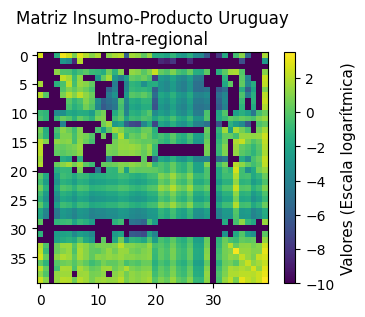

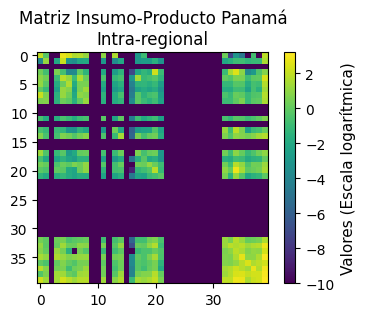

In [25]:
funciones.visualizar_mapa_de_calor(Z_URYxURY,'Matriz Insumo-Producto Uruguay','Intra-regional')
funciones.visualizar_mapa_de_calor(Z_PANxPAN,'Matriz Insumo-Producto Panamá','Intra-regional')

Puede verse en estas figuras que hay varias filas y columnas con valores muy bajos o cercanos a cero. Para estos sectores, se tiene también que la producción vale 0.

Ahora calculamos las matrices de coeficientes técnicos, multiplicando las matrices de insumo producto intra e inter-regionales por la inversa de la matriz diagonal de producción, $\mathbf{p}^{-1}$ en la notación que utilizamos hasta ahora.

Para ello, primero deberemos lidiar con las filas/columnas que contienen únicamente ceros. Por simplicidad, reemplazaremos cada uno de los elementos nulos de $\mathbf{p}$ por 1 y construiremos las matrices diagonales $\mathbf{p}^{-1}$ tomando la inversa de $\mathbf{p}$.

In [26]:
P_vector_URY=funciones.reemplazar_por_1_filas_nulas(P_vector_URY)
P_vector_PAN=funciones.reemplazar_por_1_filas_nulas(P_vector_PAN)

#Crea matriz diagonal P^-1 para cada país:
P_inv_URY = np.diag(1/P_vector_URY)
P_inv_PAN = np.diag(1/P_vector_PAN)

Y con esto podemos obtener los coeficientes técnicos de las economías inter e intra-regionales.

In [27]:
#Obtiene matriz de coeficientes técnicos
A_URYxURY = Z_URYxURY@P_inv_URY
A_PANxPAN = Z_PANxPAN@P_inv_PAN
A_URYxPAN = Z_URYxPAN@P_inv_PAN
A_PANxURY = Z_PANxURY@P_inv_URY

Con estas matrices estamos en condiciones de simular los shocks requeridos en la economía de Uruguay (región $r$ en nuestra notación). Contamos con datos de coeficientes técnicos y de producciones por sector. Sin embargo, no conocemos la demanda.

Para calcular la demanda, volvemos a considerar el modelo de Leontief para dos regiones:

$\begin{pmatrix}
I - A^{rr} & -A^{rs} \\
-A^{sr} & I - A^{ss}
\end{pmatrix}
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix} =
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}$

Obteniendo que la demanda puede calcularse como:

$
d^{r}=(I-A^{rr})p^{r}-A^{rs}p^{s}
$

Análogamente, es posible obtener la demanda con un modelo más simple en el que se considera solo la región $r$:

$
d^{r}=(I-A^{rr})p^{r}
$

Implementando esto distintas funciones, obtenemos el vector correspondiente a cada modelo:

In [28]:
d_vector_URY_modelo_simple = funciones.obtener_demanda_sector_r_modelo_simple(A_URYxURY,P_vector_URY)

d_vector_URY_formula_completa = funciones.obtener_demanda_sector_r_formula_completa(A_URYxURY,A_URYxPAN,P_vector_URY,P_vector_PAN)

Conociendo la demanda, podemos evaluar el impacto en la producción de la región con dos modelos.

Modelo simple:

$$\Delta p^{r}=\left( I - A^{rr}\right)^{-1} \Delta d^{r}$$

Fórmula completa:

$$\Delta p^{r}=\left( I - A^{rr} - A^{rs}(I - A^{ss})^{-1} A^{sr} \right)^{-1} \Delta d^{r}$$

En el archivo **funciones.py**, se encuentra la implementación de ambos modelos.

 Exploraremos caso por caso:

* Shock negativo sobre el sector s05 del 10% del total del sector.

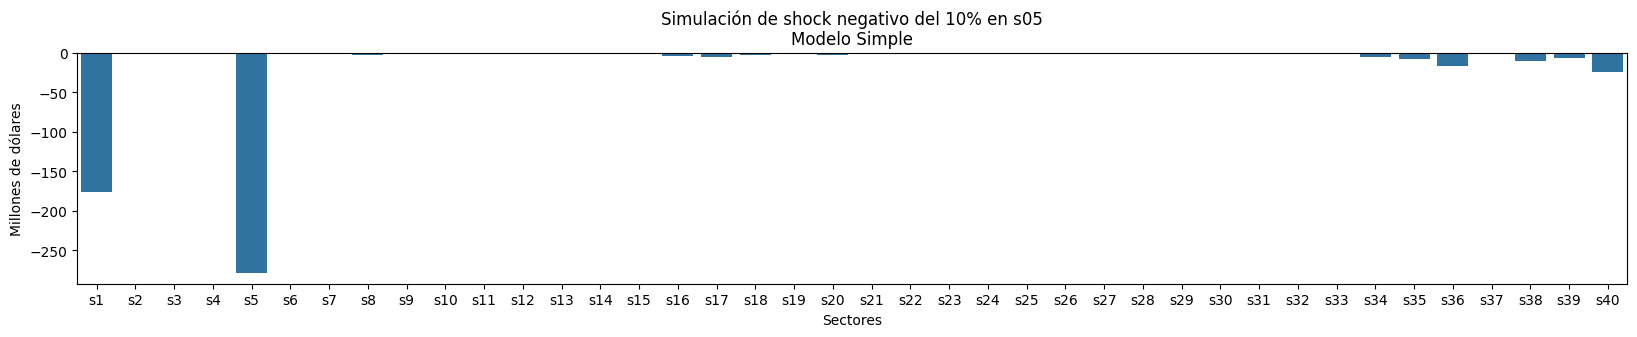

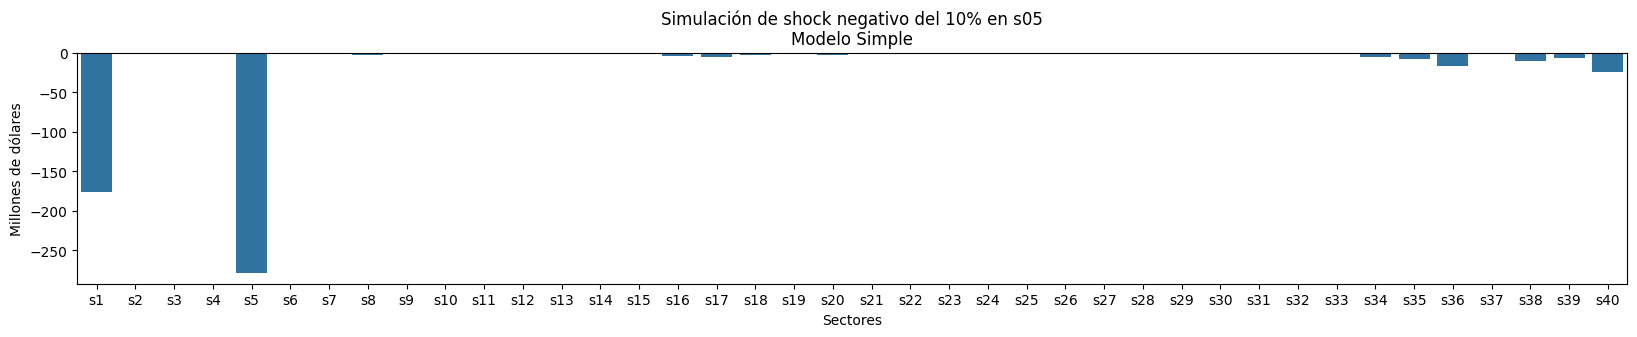

In [29]:
# Tomamos el vector de producción de Uruguay
# Con él determinamos qué valor representa el 10% del total de la demanda del sector s05 (elemento 5 del vector)

# Con el modelo simple
delta_d = np.zeros(40) #Inicializamos el vector de variación como un vector de la dimensión adecuada y nulo
delta_d[4]=-d_vector_URY_modelo_simple[4]*0.1 #En el sector s05, incluimos el shock negativo
delta_p_modelo_simple = funciones.obtener_delta_p_modelo_simple(A_URYxURY,delta_d)

# Con la fórmula completa
delta_d = np.zeros(40) #Inicializamos el vector de variación como un vector de la dimensión adecuada y nulo
delta_d[4]=-d_vector_URY_formula_completa[4]*0.1 #En el sector s05, incluimos el shock negativo
delta_p_formula_completa = funciones.obtener_delta_p_formula_completa(A_URYxURY,A_PANxPAN,A_URYxPAN,A_PANxURY,delta_d)

funciones.visualizar_cambios_en_produccion(delta_p_modelo_simple,'Simulación de shock negativo del 10% en s05', 'Modelo Simple')
funciones.visualizar_cambios_en_produccion(delta_p_formula_completa,'Simulación de shock negativo del 10% en s05', 'Modelo Simple')

* Shock positivo del 3.3% sobre el sector s06.

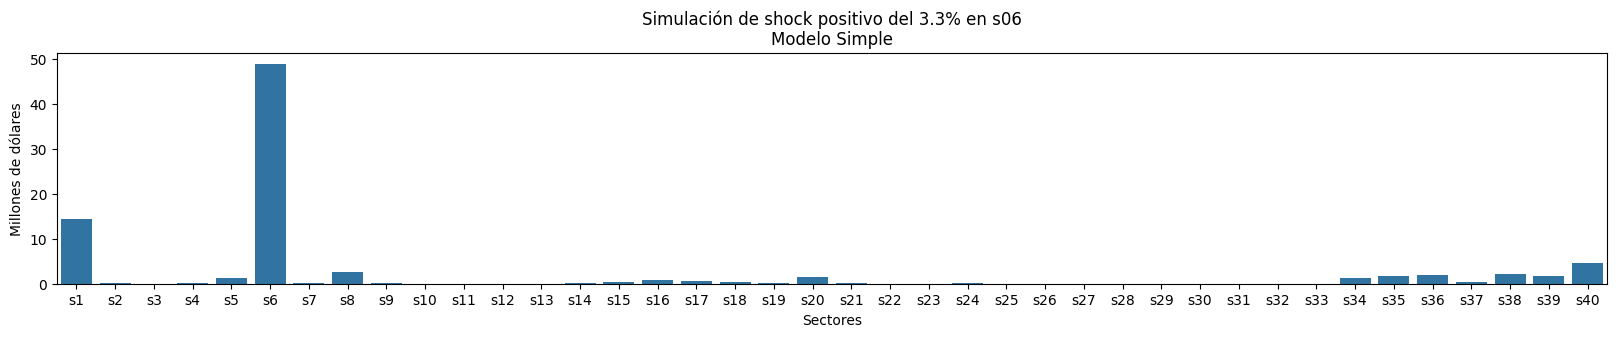

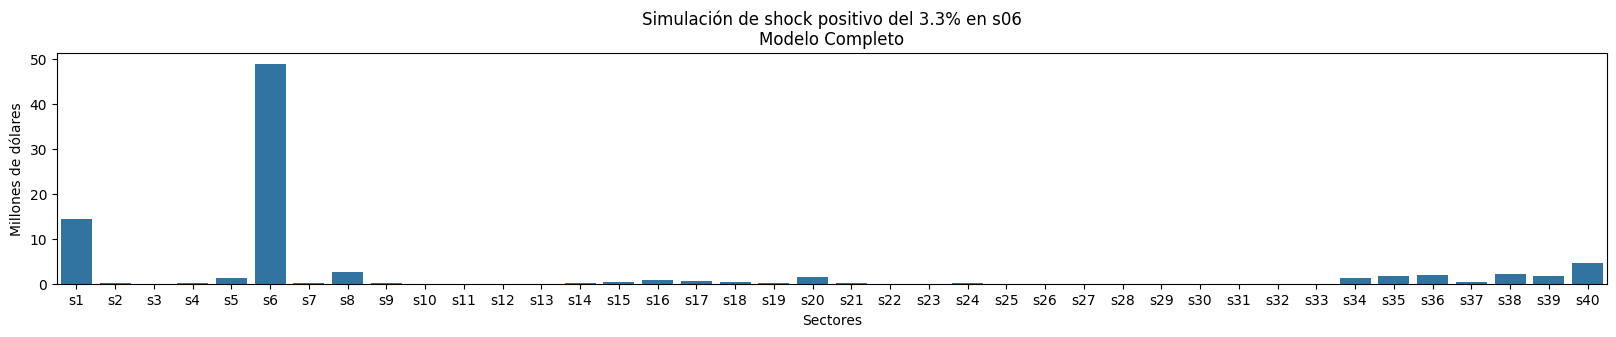

In [30]:
# Tomamos el vector de producción de Uruguay
# Con él determinamos qué valor representa el 3.3% del total del sector s06 (elemento 6 del vector)

# Con el modelo simple
delta_d = np.zeros(40) #Inicializamos el vector de variación como un vector de la dimensión adecuada y nulo
delta_d[5]=d_vector_URY_modelo_simple[5]*0.033 #En el sector s05, incluimos el shock negativo
delta_p_modelo_simple = funciones.obtener_delta_p_modelo_simple(A_URYxURY,delta_d)

# Con la fórmula completa
delta_d = np.zeros(40) #Inicializamos el vector de variación como un vector de la dimensión adecuada y nulo
delta_d[5]=d_vector_URY_formula_completa[5]*0.033 #En el sector s05, incluimos el shock negativo
delta_p_formula_completa = funciones.obtener_delta_p_formula_completa(A_URYxURY,A_PANxPAN,A_URYxPAN,A_PANxURY,delta_d)

funciones.visualizar_cambios_en_produccion(delta_p_modelo_simple,'Simulación de shock positivo del 3.3% en s06','Modelo Simple')
funciones.visualizar_cambios_en_produccion(delta_p_formula_completa,'Simulación de shock positivo del 3.3% en s06', 'Modelo Completo')

* Shock positivo del 3.3% sobre el sector s07.

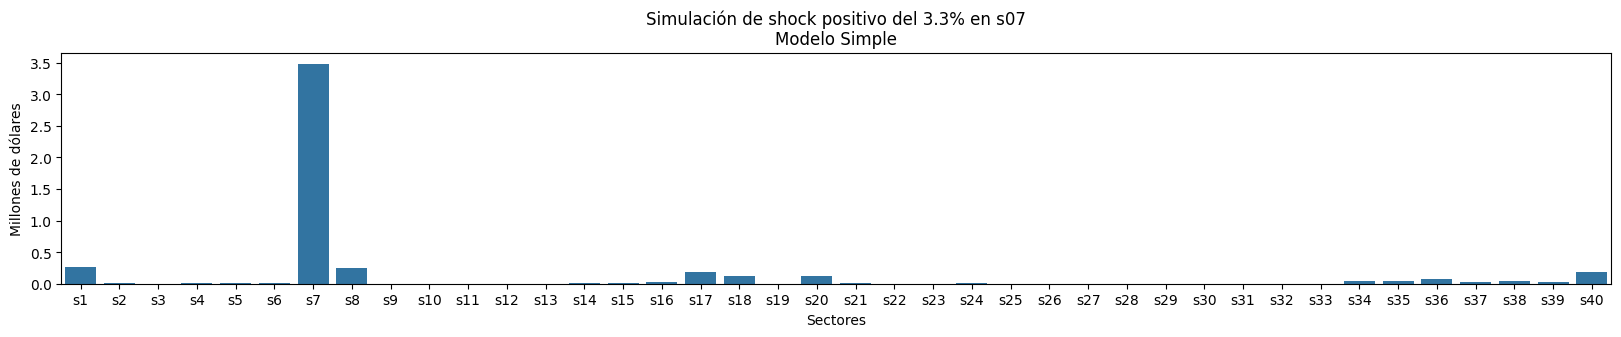

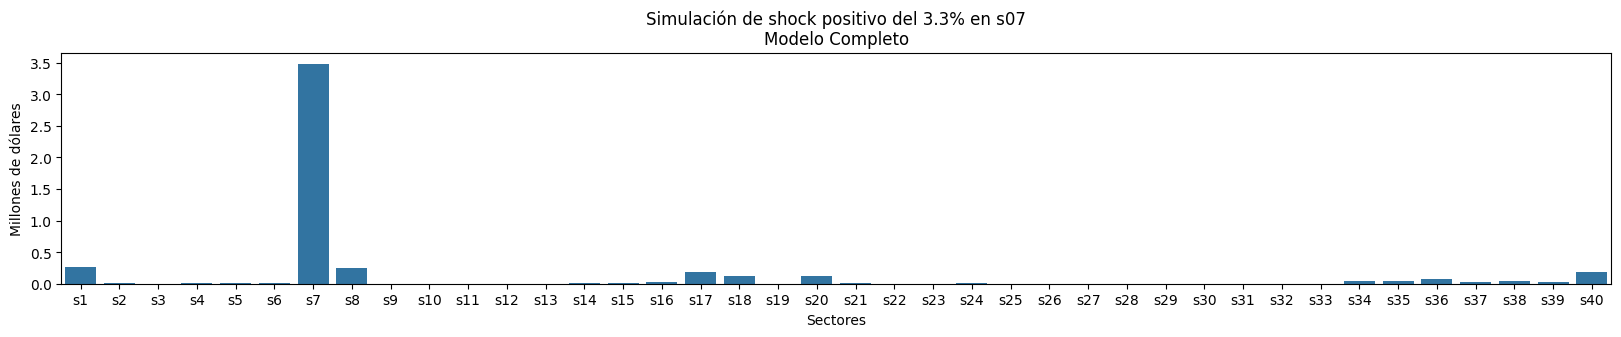

In [31]:
# Tomamos el vector de producción de Uruguay
# Con él determinamos qué valor representa el 3.3% del total del sector s07 (elemento 7 del vector)

# Con el modelo simple
delta_d = np.zeros(40) #Inicializamos el vector de variación como un vector de la dimensión adecuada y nulo
delta_d[6]=d_vector_URY_modelo_simple[6]*0.033 #En el sector s05, incluimos el shock negativo
delta_p_modelo_simple = funciones.obtener_delta_p_modelo_simple(A_URYxURY,delta_d)

# Con la fórmula completa
delta_d = np.zeros(40) #Inicializamos el vector de variación como un vector de la dimensión adecuada y nulo
delta_d[6]=d_vector_URY_formula_completa[6]*0.033 #En el sector s05, incluimos el shock negativo
delta_p_formula_completa = funciones.obtener_delta_p_formula_completa(A_URYxURY,A_PANxPAN,A_URYxPAN,A_PANxURY,delta_d)

funciones.visualizar_cambios_en_produccion(delta_p_modelo_simple,'Simulación de shock positivo del 3.3% en s07','Modelo Simple')
funciones.visualizar_cambios_en_produccion(delta_p_formula_completa,'Simulación de shock positivo del 3.3% en s07', 'Modelo Completo')

* Shock positivo del 3.3% sobre el sector s08.

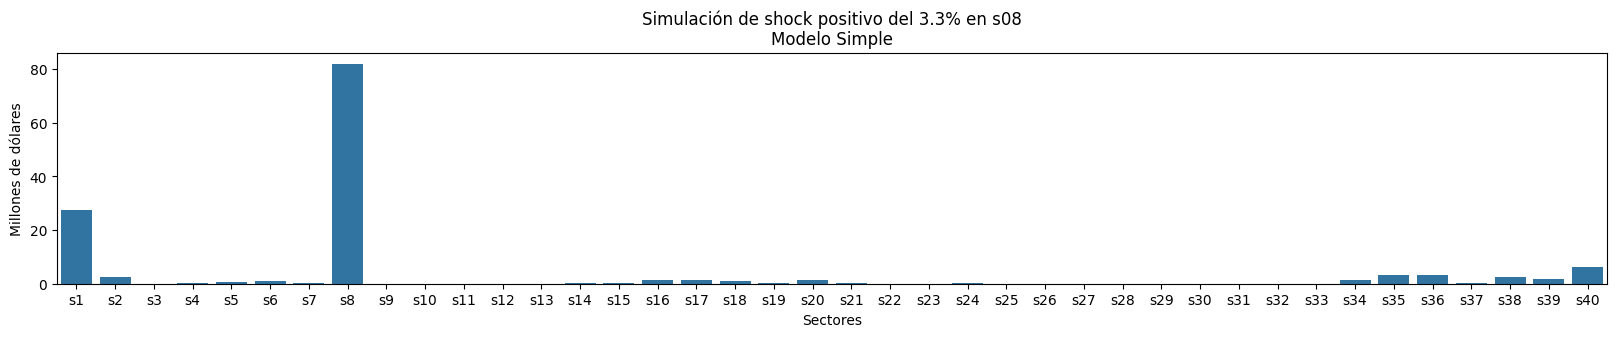

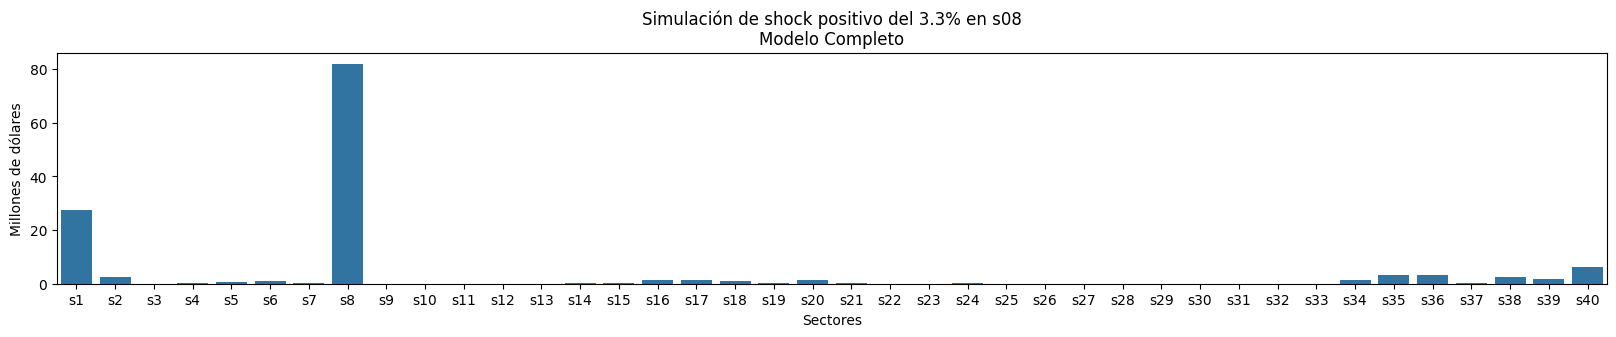

In [32]:
# Tomamos el vector de producción de Uruguay
# Con él determinamos qué valor representa el 3.3% del total del sector s08 (elemento 8 del vector)

# Con el modelo simple
delta_d = np.zeros(40) #Inicializamos el vector de variación como un vector de la dimensión adecuada y nulo
delta_d[7]= d_vector_URY_modelo_simple[7]*0.033 #En el sector s05, incluimos el shock negativo
delta_p_modelo_simple = funciones.obtener_delta_p_modelo_simple(A_URYxURY,delta_d)

# Con la fórmula completa
delta_d = np.zeros(40) #Inicializamos el vector de variación como un vector de la dimensión adecuada y nulo
delta_d[7]= d_vector_URY_formula_completa[7]*0.033 #En el sector s05, incluimos el shock negativo
delta_p_formula_completa = funciones.obtener_delta_p_formula_completa(A_URYxURY,A_PANxPAN,A_URYxPAN,A_PANxURY,delta_d)

funciones.visualizar_cambios_en_produccion(delta_p_modelo_simple,'Simulación de shock positivo del 3.3% en s08','Modelo Simple')
funciones.visualizar_cambios_en_produccion(delta_p_formula_completa,'Simulación de shock positivo del 3.3% en s08', 'Modelo Completo')

En todos los casos, puede verse que, por un lado, el shock en una región repercute en las demás y, por el otro, que el modelo simple presenta arroja resultados muy similares a los obtenidos utilizando la fórmula completa. Esto podría deberse a que la matriz inter-regional posea coeficientes técnicos pequeños, o bien, podría sugerir que shocks en la demanda de un sector de una dada región normalmente afectan significativamente la demanda de sus propios sectores.